In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_excel("22seven Insights Play with our data exercise.xlsx",sheet_name='Data')
raw_data.sample(15)

,Transaction ID,Customer ID,Merchant,Transaction Description,Transaction Date,Transaction Month,Amount
45524,45525,292,Pick n Pay,Pnp Crp Hout Bay Hout Bay Za *2573,2020-09-14 11:00:00,2020-09-01,42.55
3343,3344,580,Woolworths,Woolworths Gar Ub1163 Cape,2021-06-12 09:00:00,2021-06-01,291.45
12822,12823,245,Pick n Pay,Pnp Crp Killarney Killarney,2021-04-23 09:00:00,2021-04-01,299.98
31146,31147,598,Woolworths,Cheque Card Purchase Woolworths Ed 4Xxx *54,2020-12-30 09:00:00,2020-12-01,1236.40
49577,49578,408,Checkers,Checkers Degrendel Cape Town Za,2020-08-07 11:00:00,2020-08-01,97.98
31140,31141,39,Woolworths,Cheque Card Purchase Woolworths Be 5Xxx *55,2020-12-30 09:00:00,2020-12-01,227.91
16327,16328,51,Checkers Sixty60,Checkers Sixty60 _ Brackenfell,2021-04-02 09:00:00,2021-04-01,464.89
38193,38194,61,Pick n Pay,Cheque Card Purchase Pnp Crp Pinel 4Xxx *52,2020-11-12 11:00:00,2020-11-01,185.94
20479,20480,426,Woolworths online,Woolworths Online Cape Town Za,2021-03-09 09:00:00,2021-03-01,605.89
64128,64129,33,Woolworths,Woolworths Laborie Cent Cape Town,2020-02-23 11:00:00,2020-02-01,235.35


### Exploratory Data Analysis
##### To begin our analysis we need to inspect the data:
- Find and fill in missing values
- Convert data types and ensure they are in the correct format
- Create new features that will bring more insights

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69710 entries, 0 to 69709
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction ID           69710 non-null  int64         
 1   Customer ID              69710 non-null  int64         
 2   Merchant                 69710 non-null  object        
 3   Transaction Description  69664 non-null  object        
 4   Transaction Date         69710 non-null  datetime64[ns]
 5   Transaction Month        69710 non-null  datetime64[ns]
 6   Amount                   69710 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 3.7+ MB



-	We have 69710 rows of data entries and 7 feature columns as listed in the introduction section.
-	We have 2 categorical data types, 2 date data types and 1 numerical feature. Transaction ID and customer ID are listed as integer data types which is incorrect for our purpose and will be converted into string format as nominal features.
-	Transaction Description contains information relating to merchant store, card type used, account/card number and location of the merchant store. For the purposes of this analysis we will not be processing this data however for an extensive analysis we could parse this information to obtain more granular insights
-   For Merchant feature, we have 3 unique stores (PnP, Woolworths, Checkers) with their online variants and delivery app versions. We can extract purchase preference information.


In [11]:
raw_data['Transaction ID'] = raw_data['Transaction ID'].astype(str)
raw_data['Customer ID'] = raw_data['Customer ID'].astype(str)
raw_data.describe(include='all',datetime_is_numeric=True)

,Transaction ID,Customer ID,Merchant,Transaction Description,Transaction Date,Transaction Month,Amount
count,69710,69710,69710,69664,69710,69710,69710.000000
unique,69709,889,8,22761,NaN,NaN,NaN
top,1,91,Woolworths,Checkers Sixty60 _ Brackenfell,NaN,NaN,NaN
freq,2,482,24951,601,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2020-11-10 15:57:40.771768832,2020-10-26 09:48:08.779227904,536.527316
min,NaN,NaN,NaN,NaN,2020-01-01 10:00:00,2020-01-01 00:00:00,0.010000
25%,NaN,NaN,NaN,NaN,2020-07-08 11:00:00,2020-07-01 00:00:00,112.450000
50%,NaN,NaN,NaN,NaN,2020-12-05 09:00:00,2020-12-01 00:00:00,284.845000
75%,NaN,NaN,NaN,NaN,2021-03-27 09:00:00,2021-03-01 00:00:00,635.275000
max,NaN,NaN,NaN,NaN,2021-06-30 09:00:00,2021-06-01 00:00:00,70000.000000


In [ ]:
raw_data.Merchant.unique()

array(['Checkers', 'Pick n Pay', 'Woolworths', 'Checkers Sixty60',
       'Pick n Pay online', 'Woolworths Dash', 'Woolworths online',
       'Pick n Pay asap!'], dtype=object)

In [103]:
df = raw_data.copy().drop(columns='Transaction Description')
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['Time'] = df['Transaction Date'].dt.time
df['Year_Month'] = df['Transaction Date'].dt.to_period('M')
df['Day_of_Week'] = df['Transaction Date'].dt.day_name()
df['Weekend'] = df['Transaction Date'].dt.dayofweek // 5 == 1 
df['Weekend'] = df['Weekend'].map({False: 'Weekday', True: 'Weekend'})
df.drop(columns=['Transaction Date','Transaction Month'],inplace=True)
df

,Transaction ID,Customer ID,Merchant,Amount,Year,Month,Day,Time,Year_Month,Day_of_Week,Weekend
0,1,1,Checkers,2644.39,2020,10,19,11:00:00,2020-10,Monday,Weekday
1,2,2,Checkers,202.45,2021,6,30,09:00:00,2021-06,Wednesday,Weekday
2,3,3,Pick n Pay,130.75,2021,6,30,09:00:00,2021-06,Wednesday,Weekday
3,4,4,Pick n Pay,720.32,2021,6,30,09:00:00,2021-06,Wednesday,Weekday
4,5,5,Pick n Pay,33.99,2021,6,30,09:00:00,2021-06,Wednesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...
69705,69706,680,Checkers,328.60,2020,1,1,10:00:00,2020-01,Wednesday,Weekday
69706,69707,294,Woolworths,212.83,2020,1,1,10:00:00,2020-01,Wednesday,Weekday
69707,69708,249,Woolworths,511.02,2020,1,1,10:00:00,2020-01,Wednesday,Weekday
69708,69709,703,Woolworths,71.98,2020,1,1,10:00:00,2020-01,Wednesday,Weekday


In [16]:
print(df['Weekend'].value_counts())
print(df['Day_of_Week'].value_counts())

0    53376
1    16334
Name: Weekend, dtype: int64
Tuesday      12678
Wednesday    10828
Saturday     10700
Monday       10104
Thursday      9948
Friday        9818
Sunday        5634
Name: Day_of_Week, dtype: int64


In [19]:
df['Time'].value_counts()

09:00:00    37101
11:00:00    28271
10:00:00     4307
00:00:00       31
Name: Time, dtype: int64

#### Findings:
- 1. We have 889 unique customers in our dataset with customer no. 91 making the most transactions with 482 total transactions
- 2. Woolworths is the most used merchant with 24951 transactions made with Woolworths
- 3. Our dataset begins 1 Jan 2020 and ends 30 June 2021 which is a 18 month period which will allow us to do some forecasting

In [60]:
merchant_pivot = df.groupby(['Merchant','Year_Month']).agg({'Customer ID':'count','Amount':'sum'}).reset_index()
merchant_pivot['Year_Month'] = merchant_pivot['Year_Month'].dt.to_timestamp()
merchant_pivot

,Merchant,Year_Month,Customer ID,Amount
0,Checkers,2020-01-01,694,295760.71
1,Checkers,2020-02-01,652,306252.11
2,Checkers,2020-03-01,712,444556.26
3,Checkers,2020-04-01,396,354824.09
4,Checkers,2020-05-01,516,369301.28
...,...,...,...,...
128,Woolworths online,2021-02-01,39,49271.12
129,Woolworths online,2021-03-01,42,39032.66
130,Woolworths online,2021-04-01,32,34839.23
131,Woolworths online,2021-05-01,43,39823.95


In [83]:
merchant_pivot.groupby('Merchant')[['Amount','Customer ID']].sum().sort_values(by='Amount',ascending=False).reset_index().to_csv('merchant sums.csv',index=False)


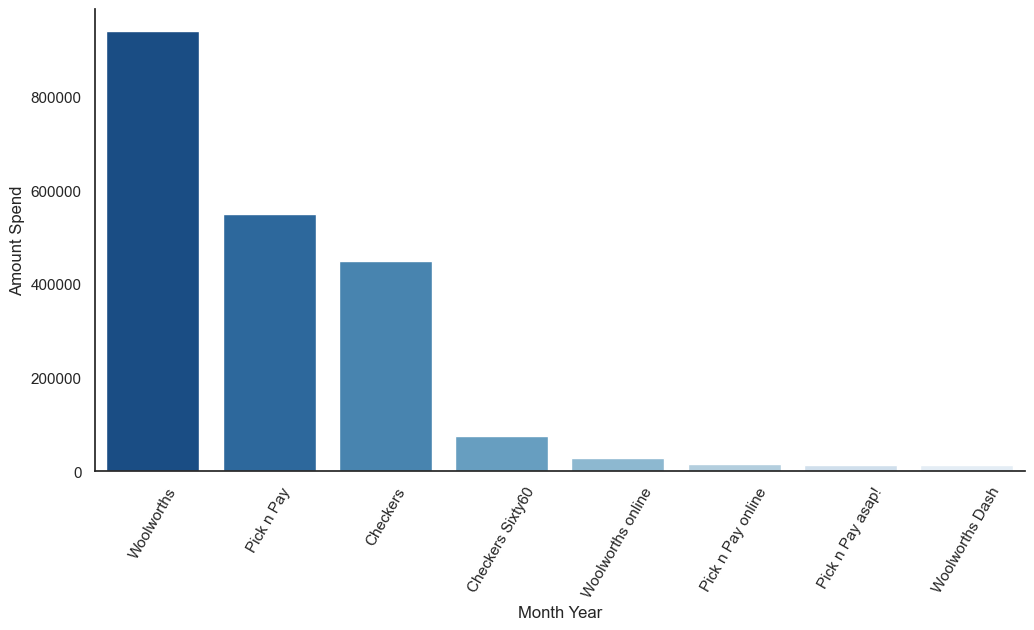

In [106]:
merchant_pivot_sorted = merchant_pivot.sort_values(by='Amount', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=merchant_pivot_sorted, x='Merchant', y='Amount', errorbar=None, palette='Blues_r')
plt.xlabel('Month Year')
plt.xticks(rotation = 60)
plt.ylabel('Amount Spend')
sns.despine()
plt.savefig('marchant_plot.png', bbox_inches='tight')
plt.show()

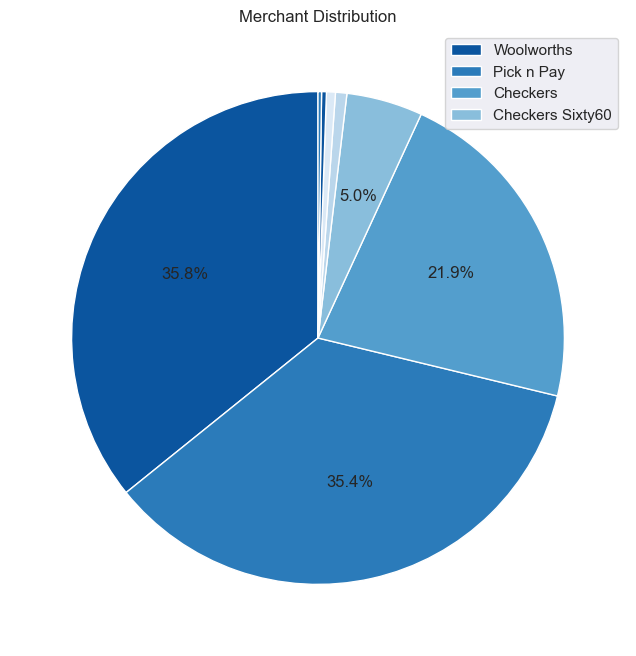

In [48]:
merchant_counts = df['Merchant'].value_counts()
top_merchants = merchant_counts.head(4)
plt.figure(figsize=(8, 8))
sns.set_palette("Blues_r")
wedges, texts, autotexts = plt.pie(merchant_counts, autopct='%1.1f%%', startangle=90)
for text, autotext, label in zip(texts, autotexts, merchant_counts.index):
    if label not in top_merchants.index:
        text.set_text('')
        autotext.set_text('')
plt.title('Merchant Distribution')
plt.legend(top_merchants.index)
plt.savefig('merchant_distribution_pie.png', bbox_inches='tight')
plt.show()

In [70]:
raw_data['Transaction Date'].nunique()

772

In [69]:
merchant_counts

Woolworths           24951
Pick n Pay           24696
Checkers             15269
Checkers Sixty60      3486
Woolworths online      518
Pick n Pay asap!       409
Pick n Pay online      219
Woolworths Dash        162
Name: Merchant, dtype: int64

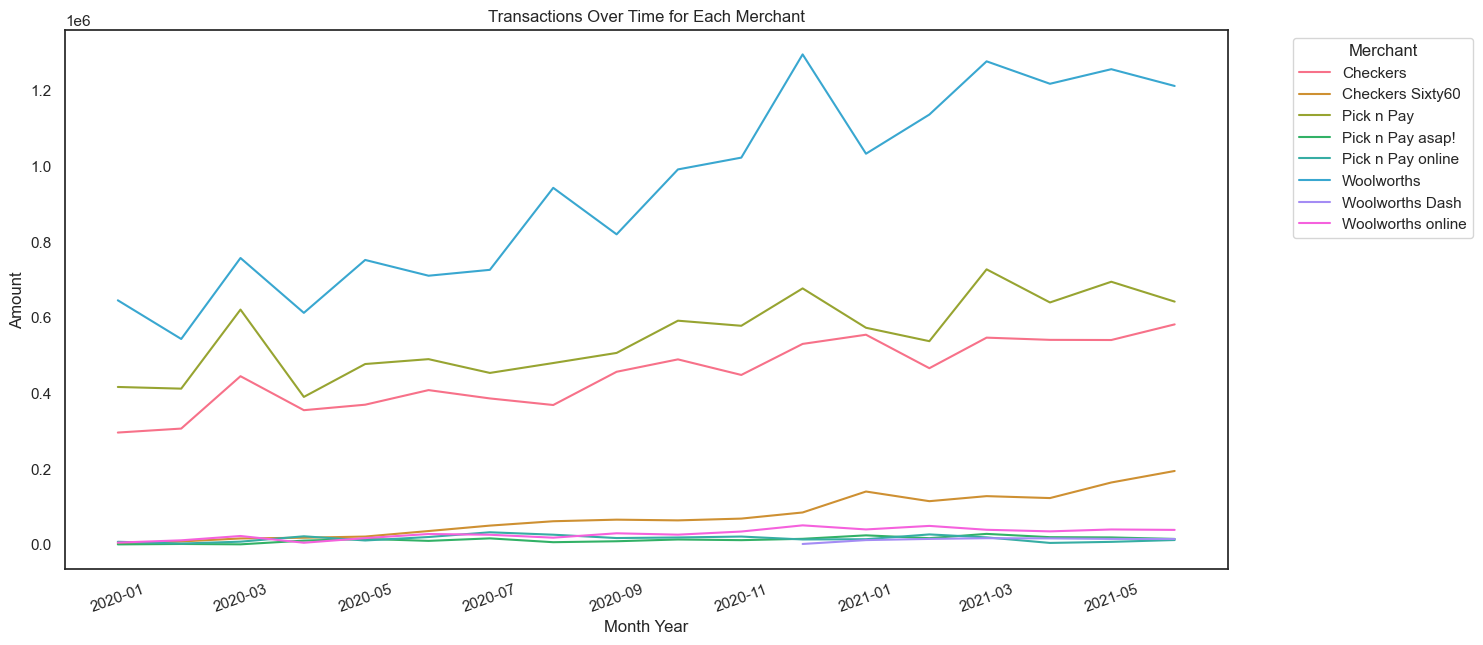

In [66]:
sns.set(style="white")
plt.figure(figsize=(15, 7))
sns.lineplot(data=merchant_pivot, x='Year_Month', y='Amount', hue='Merchant', palette='husl')
plt.xlabel('Month Year')
plt.ylabel('Amount')
plt.title('Transactions Over Time for Each Merchant')
plt.xticks(rotation=20)
plt.legend(title='Merchant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('transactions_over_time.png', bbox_inches='tight')
plt.show()

### Time Series Analysis

In [104]:

monthly_pivot = df.groupby(['Month','Weekend'])['Amount'].sum().reset_index()
monthly_pivot['Month'] = pd.to_datetime(monthly_pivot['Month'], format='%m').dt.strftime('%B')
monthly_pivot

,Month,Weekend,Amount
0,January,Weekday,2651490.48
1,January,Weekend,1110561.17
2,February,Weekday,2590817.55
3,February,Weekend,1054128.94
4,March,Weekday,3697878.07
5,March,Weekend,950563.36
6,April,Weekday,3039772.50
7,April,Weekend,966129.27
8,May,Weekday,3134299.99
9,May,Weekend,1261141.98


In [112]:
sns.color_palette("Paired")[6:8]

[(0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0)]

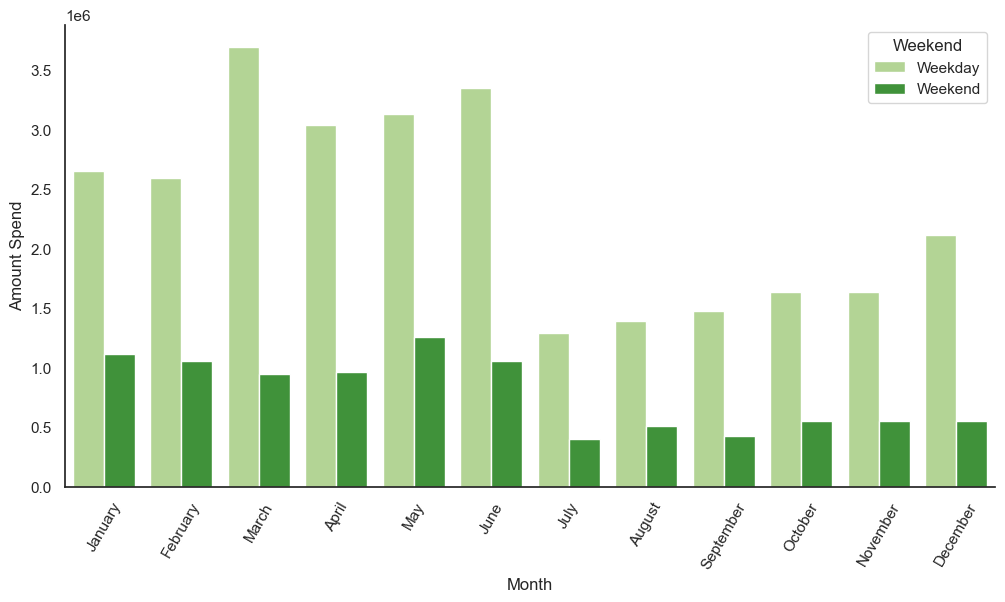

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_pivot, x='Month', y='Amount', errorbar=None, hue='Weekend', palette=sns.color_palette("Paired")[2:4])
plt.xlabel('Month')
plt.xticks(rotation = 60)
plt.ylabel('Amount Spend')
sns.despine()
plt.savefig('time_plot.png', bbox_inches='tight')
plt.show()

In [139]:
physical_stores = ['Checkers', 'Pick n Pay', 'Woolworths']
df['Store_Type'] = df['Merchant'].apply(lambda x: 'Physical Store' if x in physical_stores else 'Online Platform')
daily_pivot = df.groupby(['Year_Month', 'Store_Type'])['Amount'].sum().reset_index()
daily_pivot = daily_pivot.pivot(index='Year_Month', columns='Store_Type', values='Amount').reset_index()
daily_pivot['Year_Month'] = pd.to_datetime(daily_pivot['Year_Month'].astype(str))
daily_pivot


Store_Type,Year_Month,Online Platform,Physical Store
0,2020-01-01,16446.38,1356818.66
1,2020-02-01,23640.96,1260791.94
2,2020-03-01,46946.36,1821641.09
3,2020-04-01,55140.46,1356536.51
4,2020-05-01,63958.41,1597529.01
5,2020-06-01,93225.30,1607293.77
6,2020-07-01,124738.12,1564451.84
7,2020-08-01,112020.93,1789753.22
8,2020-09-01,121478.13,1781401.84
9,2020-10-01,122138.57,2070644.43


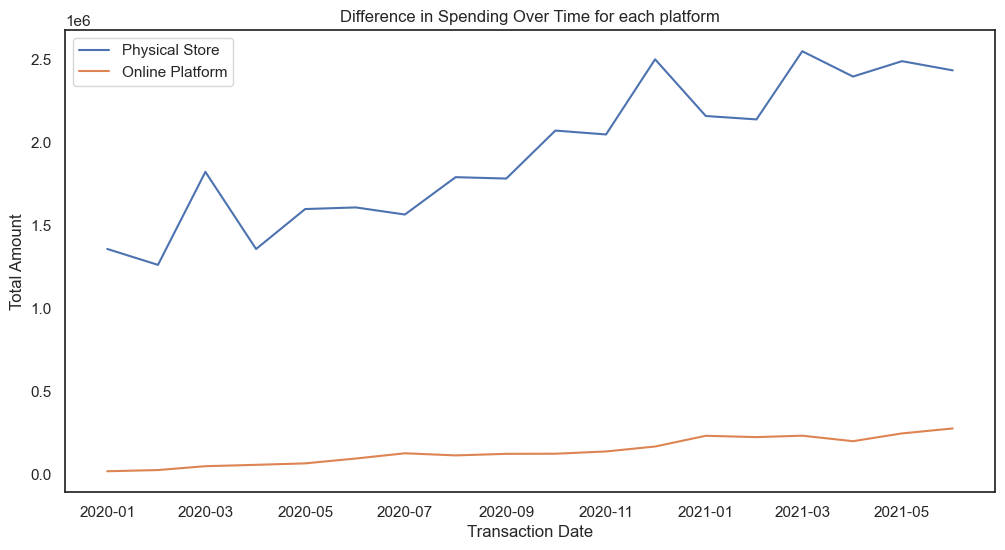

In [141]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_pivot, x='Year_Month', y='Physical Store', label='Physical Store')
sns.lineplot(data=daily_pivot, x='Year_Month', y='Online Platform', label='Online Platform')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')
plt.title('Difference in Spending Over Time for each platform')
plt.legend()
plt.savefig('platform_plot.png', bbox_inches='tight')
plt.show()

In [144]:
raw_data.to_csv('data.csv',index=False)

In [143]:
raw_data

,Transaction ID,Customer ID,Merchant,Transaction Description,Transaction Date,Transaction Month,Amount
0,1,1,Checkers,Checkers Hyper Toka 4**55,2020-10-19 11:00:00,2020-10-01,2644.39
1,2,2,Checkers,(Effec *2021) Freshx Mooi River Potch 6614,2021-06-30 09:00:00,2021-06-01,202.45
2,3,3,Pick n Pay,Cheque Card Purchase Pnp Crp Queen 4Xxx *81,2021-06-30 09:00:00,2021-06-01,130.75
3,4,4,Pick n Pay,Cheque Card Purchase Pnp Crp Rand 5Xxx *31,2021-06-30 09:00:00,2021-06-01,720.32
4,5,5,Pick n Pay,Pnp Fran Westville ...,2021-06-30 09:00:00,2021-06-01,33.99
...,...,...,...,...,...,...,...
69705,69706,680,Checkers,Checkers Lorra Nb0002 Port,2020-01-01 10:00:00,2020-01-01,328.60
69706,69707,294,Woolworths,Woolworths Hermanus 4**84,2020-01-01 10:00:00,2020-01-01,212.83
69707,69708,249,Woolworths,Woolworths Da Luz Cape Sea Point,2020-01-01 10:00:00,2020-01-01,511.02
69708,69709,703,Woolworths,M*Woolworths W Ub0001 Klerk,2020-01-01 10:00:00,2020-01-01,71.98
